In [1]:
# Standard modules
import logging
import yaml
import os
from bokeh.io import output_notebook
output_notebook()

# Custom modules
from preprocessing import mphData, computeMph, generateMph

Loading BokehJS ...

In [2]:
def list_files_in_directory(directory:str=None):
    """Function finds all files in a driectory and verifies that the files exist

    Args:
        directory (str): directory to get file names

    Returns:
        list: list of exisiting file names
    """
    try:
        files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
        return files
    except Exception as e:
        return []

In [3]:
# Path to the JSON metadata file
configurationFilePath = "configuration.yaml"

#==========================================================================
# Configuration data loading
#==========================================================================

with open(configurationFilePath, "r") as file:
    configurationData = yaml.safe_load(file)
    
#==========================================================================
# Configuration imports
#==========================================================================

# Extract data configuration
raw_file_path       = configurationData["data"]["raw_file_path"]
processed_file_path = configurationData["data"]["processed_file_path"]

# Extract outputs configuration
models_file_path      = configurationData["output"]["models_file_path"]
training_file_path    = configurationData["output"]["training_file_path"]
performance_file_path = configurationData["output"]["performance_file_path"]
summaries_file_path   = configurationData["output"]["summaries_file_path"]

# Extract mph configuration
coord1          = configurationData["mph"]["coord1"]
coord2          = configurationData["mph"]["coord2"]
labelColumn     = configurationData["mph"]["labelColumn"]
label           = configurationData["mph"]["label"]
parameter       = configurationData["mph"]["parameter"]
RipsMax         = configurationData["mph"]["RipsMax"]
scaling         = configurationData["mph"]["scaling"]
k_family        = configurationData["mph"]["k_family"]
resolution      = configurationData["mph"]["resolution"]
grid_step_size  = configurationData["mph"]["grid_step_size"]
plot_indices    = configurationData["mph"]["plot_indices"]

# Extract model configurations
cnn          = configurationData["model"]["cnn"]
supervised   = configurationData["model"]["supervised"]
unsupervised = configurationData["model"]["unsupervised"]

In [4]:
# Get files to process
files = list_files_in_directory(raw_file_path)

# Get Data for processing
X, parameter_level = mphData(file=f"{raw_file_path}{files[7]}", coord1=coord1, coord2=coord2, labelColumn=labelColumn, label=label, parameter=parameter, RipsMax=RipsMax, scaling=scaling)

# Generate mph landscape
multi_landscape = computeMph(X, parameter_level, RipsMax=RipsMax, k_family=k_family, resolution=resolution, grid_step_size=grid_step_size)
print(multi_landscape)

Multiparameter Landscapes([[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]])


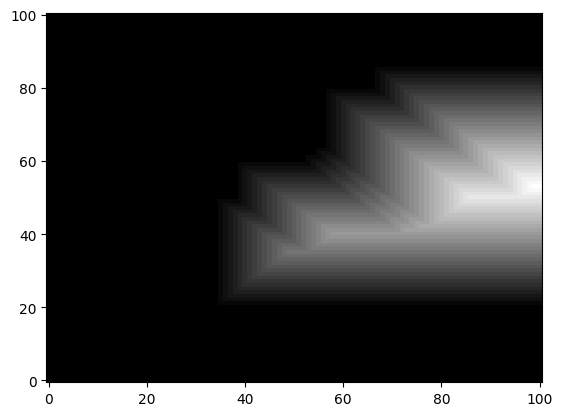

In [10]:
import matplotlib.pyplot as plt

multi_landscape.landscape_matrix

plt.imshow(multi_landscape.landscape_matrix[0,:, :],
                origin='lower', aspect='auto', cmap='gray')